In [5]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9],[1.9,2.2],[3.1,3],[2.3,2.7],[2,1.6],[1,1.1],[1.5,1.6],[1.1,0.9]])
print(A.shape)
# calculate the mean of each column
M = mean(A.T, axis=1)
print()
print(M)
# center columns by subtracting column means
C = A - M
print(C)
import matplotlib.pyplot as plt

(10, 2)

[1.81 1.91]
[[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]


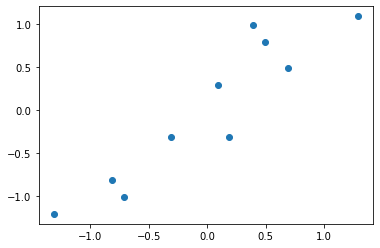

In [6]:
#The first argument (C[:,0]) represents the x-coordinates of the points,
#and the second argument (C[:,1]) represents the y-coordinates of the points.
#Each pair (C[i,0], C[i,1]) represents a point in the scatter plot.

plt.scatter(C[:,0],C[:,1])

Here's why transposition might be necessary in below line:

1. Orientation of Variables and Observations:

In the original matrix CC, rows represent observations (different data points) and columns represent variables (different features or characteristics). This orientation is common in datasets.
        
However, the cov() function in NumPy calculates the covariance between rows, not columns. So, if you pass CC directly to cov(), it would calculate the covariance between observations, not variables, which might not be the desired behavior in many cases.

2. Transposition for Variable-wise Covariance:
        
By transposing CC (i.e., using C.TC.T), you change the orientation so that rows now represent variables and columns represent observations.
        
Calculating the covariance of the transposed matrix (C.TC.T) gives you the covariance matrix between variables, which is what you typically want in data analysis: understanding how different variables (features) relate to each other across different observations (data points).

In [7]:
# calculate covariance matrix of centered matrix

V = cov(C.T)
print(V)

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


how argsort() and -1 works
For example, if eigvalues initially was [3, 1, 2], argsort() would return [1, 2, 0] because the second element (index 1) is the smallest, followed by the third element (index 2), and then the first element (index 0) is the largest. By adding [::-1], the array is reversed, so idx will be [0, 2, 1]

In [8]:
##Calculate eigvector(V) for projection
import numpy as np

##calculates the eigenvalues and eigenvectors of the covariance matrix VV
eigvalues,eigvector=np.linalg.eig(V) 

##Pick the higest Eign vector
# below, sorts the eigenvalues in descending order, argsort() returns the indices,
#idx will hold an array of indices

idx = eigvalues.argsort()[::-1]   
eigvalues = eigvalues[idx]
eigvector= eigvector[:,idx]

eig1=eigvector[:,:1] 
# selects the first column (the first eigenvector) from the rearranged eigenvector matrix
#eig1 now contains the eigenvector corresponding to the largest eigenvalue

eig2=eigvector[:,1:]
#selects all columns starting from the second column
#eig2 contains eigenvectors corresponding to eigenvalues other than the largest one

In [12]:
print(eigvector)

print()

print(eigvalues)

print()

print(eig1)
print()
print(eig2)

[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]

[1.28402771 0.0490834 ]

[[-0.6778734 ]
 [-0.73517866]]

[[-0.73517866]
 [ 0.6778734 ]]


[[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


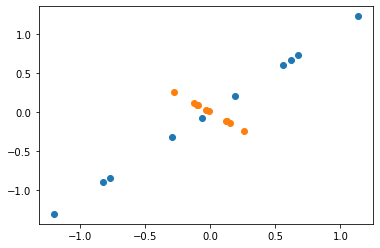

In [13]:
#This projection results in a new 1-dimensional array (Z1) where each element represents 
#a projection of the original data onto the first principal component.

Z1=np.dot(C,eig1)

#projection of the original data onto the second principal component.

Z2=np.dot(C,eig2)

#Z is a 10x2 matrix where each row represents the projection of the original data onto the 
#principal components represented by the columns of eigvector.

Z=np.dot(C,eigvector)
print(Z) #matrix Z, showing how the original data has been projected onto the principal components

#Multiplying Z1 (1-dimensional array) with eig1.T effectively scales the first principal component
#back to the original feature space. PC1 represents the reconstruction of the original data 
#based on the first principal component.

PC1=Z1*eig1.T

#PC2 represents the reconstruction of the original data based on the second principal component.

PC2=Z2*eig2.T

plt.scatter(PC1[:,0],PC1[:,1]) #scatter plot of the first principal component scores
plt.scatter(PC2[:,0],PC2[:,1])

In summary, the code performs a PCA by projecting the original data onto its principal components, then reconstructs the data back into the original feature space using these components, and finally, visualizes the reconstructed data using scatter plots.

In [9]:
##Pca through numpy
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()

# Fits the PCA model to the dataset A. During this step, PCA calculates the 
#principal components and eigenvalues necessary for the transformation.

pca.fit(A)
# access values and vectors
#Prints the principal components. pca.components_ is a matrix where each row represents 
#a principal component. Transposing it (.T) makes it so that each column represents 
#a principal component

print(pca.components_.T)  

[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


In [16]:
#prints the eigenvalues of the covariance matrix, which represent the amount of variance
#captured by each principal component. The eigenvalues are in descending orde

print(pca.explained_variance_)   ##will output the eigenvalues.
# transform data
B = pca.transform(A) # transformed data B represents the original data projected onto the principal components.
print()
print(B)   ##Length of vector projection

#length of each row in B (i.e., the number of columns in B) represents the number of principal
#components you chose to keep during PCA. Each column in B corresponds to a different principal
#component, and the values in each column represent the projection of the data points onto that
#specific principal component.

[1.28402771 0.0490834 ]

[[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


pca.explained_variance_ contains the eigenvalues (variances) of the principal components.
np.sum(pca.explained_variance_) calculates the total variance.
Dividing each eigenvalue by the total variance gives the proportion of variance explained by each principal component.

The explained_variance_ratio_ attribute is provided by scikit-learn and automatically computes the ratio of each principal component's variance to the total variance, giving values between 0 and 1.

In [15]:

#calculates the proportion of variance explained by each principal component. 
print(pca.explained_variance_/np.sum(pca.explained_variance_))
print()
print(pca.explained_variance_ratio_)

[0.96318131 0.03681869]

[0.96318131 0.03681869]


In [17]:
##Do PCA on iris data set and findout how many componets capture 90% variability